# **Assignment: Logistic Regression**



> Group name : Insurgents_Sales Prediction 



> Group Submission by


1.   Chaitrali Deshmukh(012501489)
2.   Prathyusha Kasibhatta(013774163)
3.   Sandhya Gadgoli(013798759)
4.   Saylee Vyawahare(013801294)


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import  linear_model, metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [0]:
#loading the dataset
dataset = pd.read_csv('/content/drive/My Drive/train_modified.csv')
dataset.head()



,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15
0,FDP36,10.395000,0.073297,51.4008,OUT018,2009,556.6088,3,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,FDW12,12.792854,0.035400,144.5444,OUT027,1985,4064.0432,5,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,FDC37,12.792854,0.057557,107.6938,OUT019,1985,214.3876,4,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,FDL12,15.850000,0.121633,60.6220,OUT046,1997,2576.6460,8,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,FDL12,15.850000,0.121532,59.2220,OUT013,1987,599.2200,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#Create a predictSales column and add it to the dataset
dataset['Predict_Sales'] = ""

def predictSales():
  x = []
  for i, saleRecord in enumerate(dataset['Item_Outlet_Sales']):
    if saleRecord < 5000:
      x.append("Low")
    else:
      x.append("High")
  return x

#Categorize sales to Low and High
dataset['Predict_Sales'] = predictSales()
dataset.head(5)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15,Predict_Sales
0,FDP36,10.395000,0.073297,51.4008,OUT018,2009,556.6088,3,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Low
1,FDW12,12.792854,0.035400,144.5444,OUT027,1985,4064.0432,5,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Low
2,FDC37,12.792854,0.057557,107.6938,OUT019,1985,214.3876,4,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Low
3,FDL12,15.850000,0.121633,60.6220,OUT046,1997,2576.6460,8,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Low
4,FDL12,15.850000,0.121532,59.2220,OUT013,1987,599.2200,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Low


In [0]:
## Formatting Text data

dataset = dataset.replace(['Low', 'High'],[0, 1]) 
dataset.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15,Predict_Sales
0,FDP36,10.395000,0.073297,51.4008,OUT018,2009,556.6088,3,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,FDW12,12.792854,0.035400,144.5444,OUT027,1985,4064.0432,5,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,FDC37,12.792854,0.057557,107.6938,OUT019,1985,214.3876,4,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,FDL12,15.850000,0.121633,60.6220,OUT046,1997,2576.6460,8,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,FDL12,15.850000,0.121532,59.2220,OUT013,1987,599.2200,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#split dataset in features and target variable
feature_cols = ['Item_MRP', 'Item_Weight', 	'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Outlet_Location_Type_0',	'Outlet_Location_Type_1', 'Outlet_Location_Type_2',	'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Size_2',  'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3',	'Item_Type_0',	'Item_Type_1',	'Item_Type_2']


In [0]:
# Features
X = dataset[feature_cols] 


#S = dataset.Item_Outlet_Sales

S = dataset.Predict_Sales

# Target variable
y = S



In [0]:
# Split dataset into training set and test set

# 70% into training set and 30% into testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [0]:


# create logistic regression object 
clf = LogisticRegression()

# train the model using the training sets 
clf.fit(X_train,y_train)

# making predictions on the testing set 
y_pred = clf.predict(X_test)

#print accuracy
print(accuracy_score(y_test,y_pred)*100)




92.58064516129032


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


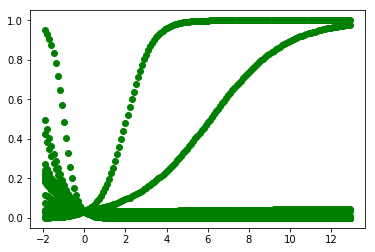

In [0]:
# Plotting sigmoid function 

def model(clf,x_train):
    return 1/(1 + np.exp(-(clf.intercept_+clf.coef_*x_train)))
for i in range(1,150,1):
    plt.plot(i/10.0-2,model(clf,i/10.0-2),'ro',color='green')

In [0]:
# The confusion matrix  result which is telling us correct predictions and incorrect predictions.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3118   26]
 [ 227   39]]



#Logistic Regression


It is the appropriate regression analysis to perform when the dependent variable is dichotomous (binary). 

It is a predictive analysis technique.

It is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables. 

**Types of Logistic Regression.**

1. Binary - When the number of possible outcomes is only two it is called Binary Logistic Regression.
2. Multinomial: Three or more categories without ordering. 
3. Ordinal: Three or more categories with ordering.

**Linear Vs Logistic Regression :**

Linear Regression could help to predict the sales on any chosen scale say 0-1million. Linear regression predictions are continuous.

Logistic Regression could help to predict whether the store had high or low sales in a year, here we have used the condition saleRecord < 5000 to predict the sales. In the table we used 0 to indicate low and 1 to indicate high sales.This data is also called as binary variable in logistic regression and this variable should be a dependent variable.

Logistic regression predictions are discrete (only specific values or categories are allowed).



**Sigmoid activation**: To map predicted values to probabilities, the sigmoid function is used. The function maps any real value into another value between 0 and 1. In machine learning, sigmoid is used to map predictions to probabilities. 


**Advantages of Logistic Regression:**

* We have many ways to regularize model. 
* We get a nice probabilistic interpretation, unlike decision trees or SVMs, and you can easily update your model to take in new data (using an online gradient descent method)
* Use it if probabilistic framework is needed (e.g., to easily adjust classification thresholds, to say when you’re unsure, or to get confidence intervals) 
* Use it if more training data is needed in the future that you want to be able to quickly incorporate into your model.



 

# **Conclusion :**

In this assignment, we have used the cleaned version of dataframe and made some changes in feature selection by adding some new feature columns to analyze the data behavior. Also, for using Logistic Reggression we have converted the outlet_sales column entries into low and High (1,0) values; this improved the accuracy.